# Python机器学习基础综合实战

来源：《python机器学习及实践》

以“良/恶性乳腺癌肿瘤预测”问题了解Python的基本编程元素和机器学习的基本步骤。

In [1]:
# 导入pandas用于读取数据
import pandas as pd

In [2]:
# 读入数据， train后缀变量保存训练集，test后缀变量保存测试集
df_train = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-train.csv')

df_test = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-test.csv')

In [3]:
# 选取'Clump Thickness'与'Cell Size'作为特征，构建测试集中的正负分类样本
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]

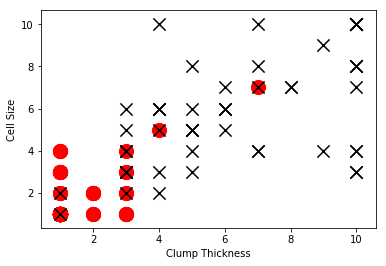

In [5]:
# 导入matplotlib包中的pyplot用于绘图
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')

# 设定x,y轴标签
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

# 显示
plt.show()


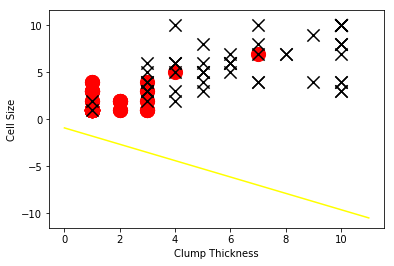

In [6]:
# 导入numpy工具包
import numpy as np

# 利用numpy中的random函数随机采样直线的截距和系数
intercept = np.random.random([1])
coef = np.random.random([2])
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]

# 绘制一条随机直线
plt.plot(lx, ly, c='yellow')

# 随机参数下的二类分类器
# 决定直线的走向有两个因素，直线的斜率和截距，我们统称为模型的参数，也是分类器需要通过学习从训练数据中学习到的
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [7]:
# 导入sklearn中的逻辑回归分类器
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 利用前10条训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy (10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (10 training samples): 0.868571428571


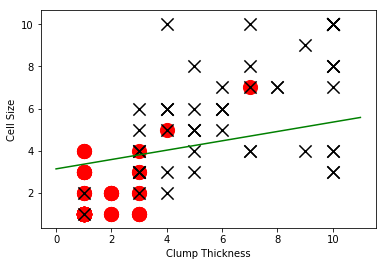

In [8]:
intercept = lr.intercept_
coef = lr.coef_[0, :]

# 原本这个分类面应该是 lx * coef[0] + ly * coef[1] + intercept=0,映射到2维平面后是：
ly = (-intercept - lx * coef[0]) / coef[1]

# 绘制新的分类，我们使用一定量的训练样本，分类器所表现的性能有了大幅度的提升
plt.plot(lx, ly, c='green')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [9]:
#使用所有的训练样本，分类器的性能进一步提升，在测试集上的分类准确性达到93.7%
lr = LogisticRegression()

lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Testing accuracy (all training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (all training samples): 0.937142857143


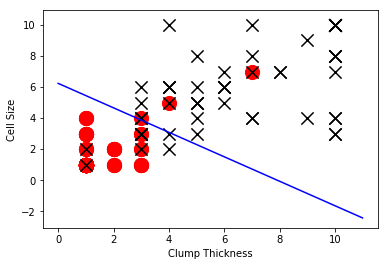

In [9]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='blue')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

数据下载链接：https://pan.baidu.com/s/1jerIu8TJkf0Ei0RRt2Gt7g 密码：pn5z